<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_02_DNN%EA%B8%B0%EC%B4%88_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜: 2022-06-27
* 이름: 박태현

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.2'

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [15]:
# 레이어는 tensorflow.keras에 있다.
from tensorflow.keras import layers, models

x = layers.Input(shape = (3), name = 'input_layer') # X : 1.3
y = layers.Dense(1, name = 'output_layer')(x) # Linear : W,b. Dense(ouput_shape)

model1 = models.Model(inputs = x, outputs = y, name = 'Model_1')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


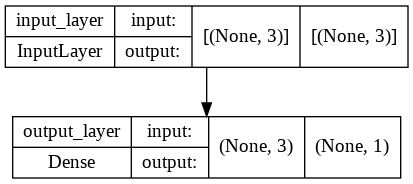

In [16]:
from tensorflow.keras import utils
# Output shape : 데이터 변환 과정
# None : 데이터 개수
# Param # : 파라미터 개수
# Trainable param : 학습 가능한 파라미터 (역전파 통해서 업데이트)
# Non-trainable param : 학습 하지 않는 파라미터
model1.summary()
utils.plot_model(model1, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [18]:
# output : 데이터의 변환 과정
for layer in model1.layers:
  print(layer.name) # 각 레이어의 이름
  print(layer.output.shape) # 각 레이어의 아웃풋의 shape

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [19]:
'''
W : (3,1)
B : (1,)
'''
for param in model1.get_weights():
  print(param.shape)

print(model1.get_weights())

(3, 1)
(1,)
[array([[ 0.54578173],
       [-1.0590113 ],
       [ 0.15368557]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [24]:
X = np.random.normal(size = (1,3))
print(X)
Y_pred = model1.predict(X)
print(Y_pred)

[[-0.61906016  1.07227176 -0.31363484]]
[[-1.5216209]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [59]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape = (3), name = 'input_layer')
y = layers.Dense(2, name = 'output_layer')(x)

model2 = models.Model(inputs = x, outputs = y, name = 'Model_2')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


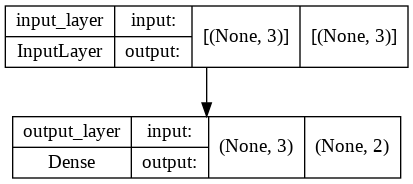

In [62]:
model2.summary()
utils.plot_model(model2, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [63]:
for layer in model2.layers:
  print(layer.name)
  print(layer.output.shape) 

input_layer
(None, 3)
output_layer
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [64]:
'''
W : (3,2)
B : (2,)
'''
for param in model2.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 2)
(2,)
[array([[ 0.6639123 , -0.597352  ],
       [ 1.0942581 ,  0.3199116 ],
       [-0.13036942,  0.1008786 ]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [65]:
X = np.random.normal(size = (1,3))
print(X)
Y_pred = model2.predict(X)
print(Y_pred)

[[ 0.3039633  -0.92612809  1.44531068]]
[[-1.0000424 -0.3320513]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

In [68]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape = (3), name = 'input_layer')
y = layers.Dense(2)(x)
y = layers.Dense(2, name = 'output_layer')(y)

model3 = models.Model(x, y, name = 'Model_3')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_43 (Dense)            (None, 2)                 8         
                                                                 
 output_layer (Dense)        (None, 2)                 6         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


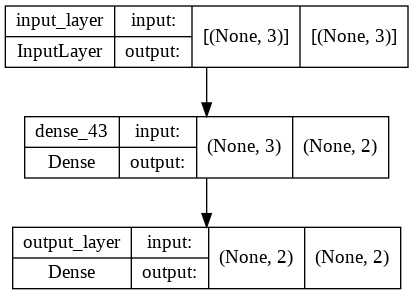

In [69]:
model3.summary()
utils.plot_model(model3, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [70]:
for layer in model3.layers:
  print(layer.name)
  print(layer.output.shape) 

input_layer
(None, 3)
dense_43
(None, 2)
output_layer
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [72]:
'''
W1 : (3,2)
B1 : (2,)
W2 : (2,2)
B2 : (2,)
'''
for param in model3.get_weights():
  print(param.shape)

print(model3.get_weights())

(3, 2)
(2,)
(2, 2)
(2,)
[array([[ 0.9701953 ,  0.5314237 ],
       [-0.9468178 , -0.71022844],
       [-0.39032316,  0.08440351]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.6016303 ,  0.96860254],
       [-0.356153  , -1.1091639 ]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [73]:
X = np.random.normal(size = (1,3))
print(X)
Y_pred = model3.predict(X)
print(Y_pred)

[[ 0.66879425 -0.38585128  0.94806392]]
[[-0.6402164  -0.16300848]]


### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_23 (Dense)            (None, 8)                 40        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


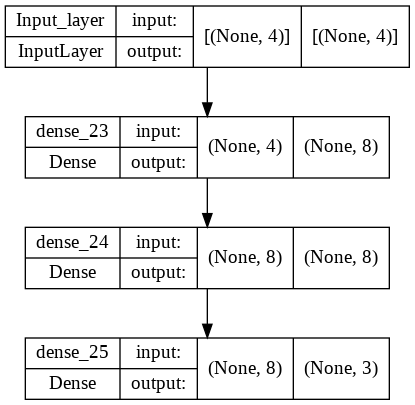

In [37]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape = (4,), name = 'Input_layer')
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs = x, outputs = y, name = 'Model_4')

model4.summary()
utils.plot_model(model4, show_shapes = True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [32]:
'''
N은 데이터 개수
X : (N,4) 
Z1 : (N,8) 
Z2 : (N,8)
Y : (N,4)
'''

for layer in model4.layers:
  print(layer.output_shape)

[(None, 4)]
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [33]:
'''
W1 : (4,8)
B1 : (8,)
W2 : (8,8)
B2 : (8,)
W3 : (8,3)
B3 : (3,)
'''

for param in model4.get_weights():
  print(param.shape)
print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[ 0.6473245 ,  0.12216115,  0.48030013, -0.56539106,  0.04498774,
        -0.2954484 ,  0.5840122 , -0.4081698 ],
       [ 0.34387332, -0.4704207 ,  0.38388664,  0.0850935 ,  0.58882934,
         0.51453155, -0.27140158, -0.56268907],
       [ 0.42454487, -0.2987077 , -0.4744646 , -0.5468296 ,  0.28049248,
        -0.40618655,  0.3390898 , -0.48295584],
       [-0.0568409 , -0.10876435,  0.38113433, -0.1246326 ,  0.00153333,
         0.480282  , -0.392667  , -0.08265787]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.48376852, -0.3489971 ,  0.29037213, -0.60723233,  0.09468967,
        -0.09167838, -0.2581211 , -0.19924316],
       [ 0.05849791,  0.17814189, -0.1117391 ,  0.3654223 ,  0.06962246,
        -0.06685299,  0.59526557, -0.22407761],
       [-0.28287512, -0.41702315, -0.13608107,  0.57942647, -0.31493884,
         0.04055554,  0.01149088,  0.28183383],
       [ 0.07236594,  0.33160967, -0.593644

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [34]:
X = np.random.normal(size = (1,4))
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)


X: [[0.23074062 0.12283454 1.92060955 0.23026733]] (1, 4)
Y_pred: [[ 1.1233077  1.2913126 -1.8214356]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [35]:
# 실제 데이터 (1000 - 100000 중에 배치 단위로 계산이 진행됨) 배치 사이즈 : 8,16, 32, 64,...
X = np.random.normal(size = (10,4)) # 배치의 개수가 10개.
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.56265941 -1.11930599 -1.62168315 -0.08868364]
 [-0.30833365 -0.10896267 -0.34824744  0.30613278]
 [ 2.58397929  2.14312546 -0.96952898  0.38596513]
 [ 0.72231013  1.29958221 -1.06096219  0.13259467]
 [-1.15152937 -0.08340602 -0.79263588  0.11044511]
 [ 0.42028024  0.11169034 -0.06389632  0.74803024]
 [-2.29332792 -0.95982726  0.12426726 -1.025605  ]
 [ 1.40385917  1.85109752  0.68456431 -0.83234805]
 [ 0.95213207 -1.26420284  0.97894441  0.6466597 ]
 [ 1.18388911  0.21520428 -0.41317217  0.47817531]] (10, 4)
Y_pred: [[ 0.06948003 -0.76407194  1.509129  ]
 [-0.41963604 -0.4081092   0.67392236]
 [ 0.18102014  1.1922596  -0.44657427]
 [-0.735319   -0.05590918  0.4827337 ]
 [-1.2418962  -1.1643493   1.3369884 ]
 [ 0.06317083  0.20939939  0.30425966]
 [-0.8965379  -1.373888    0.47161287]
 [ 0.637008    1.4695987  -2.1825414 ]
 [ 1.7150388   0.98561907 -0.6642036 ]
 [ 0.41695473  0.4692609   0.12311107]] (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [48]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model1():
  x = layers.Input(shape = (3,))
  y = layers.Dense(6)(x)
  y = layers.Dense(6)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x, y)
  return model


* 시각화

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_35 (Dense)            (None, 6)                 24        
                                                                 
 dense_36 (Dense)            (None, 6)                 42        
                                                                 
 dense_37 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


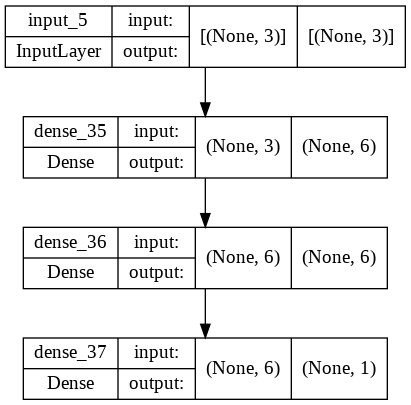

In [49]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes = True)

### | Keras Sequential API



* 모델 구현: `Sequential()`

In [50]:
def build_model2():
  model = tf.keras.Sequential() # 빈 껍질을 만들어 놓은 것
  model.add( layers.Input(shape = (3,)))
  model.add( layers.Dense(6))
  model.add( layers.Dense(6))
  model.add( layers.Dense(1))
  
  return model

* 모델 시각화

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 6)                 24        
                                                                 
 dense_39 (Dense)            (None, 6)                 42        
                                                                 
 dense_40 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


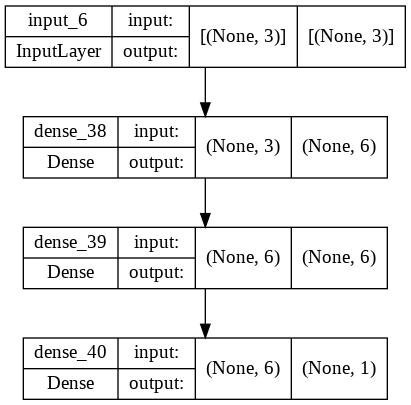

In [51]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes = True)

### | Model Class Subclassing

* 모델 구현

In [55]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올 때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (3)
    self.dense1 = layers.Dense(6, name = 'dense1')
    self.dense2 = layers.Dense(6, name = 'dense2')
    self.dense3 = layers.Dense(6, name = 'dense3')
    
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  42        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


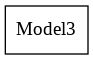

In [57]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3, show_shapes = True)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


In [74]:
def build_model1():
  x = layers.Input(shape = (4,))
  y = layers.Dense(8)(x)
  y = layers.Dense(8)(y)
  y = layers.Dense(3)(y)
  model = models.Model(x, y)
  return model


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_44 (Dense)            (None, 8)                 40        
                                                                 
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


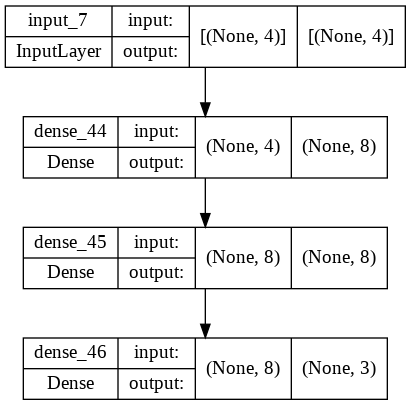

In [77]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes = True)

* keras Sequential API


In [75]:
def build_model2():
  model = tf.keras.Sequential()
  model.add( layers.Input(shape = (4,)))
  model.add( layers.Dense(8))
  model.add( layers.Dense(8))
  model.add( layers.Dense(3))
  
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 8)                 40        
                                                                 
 dense_48 (Dense)            (None, 8)                 72        
                                                                 
 dense_49 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


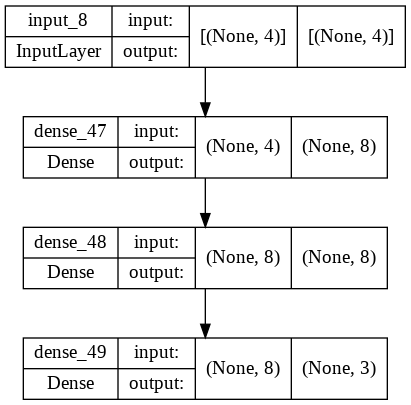

In [78]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes = True)

* Model Class Subsclassing




In [76]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올 때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (4)
    self.dense1 = layers.Dense(8, name = 'dense1')
    self.dense2 = layers.Dense(8, name = 'dense2')
    self.dense3 = layers.Dense(3, name = 'dense3')
    
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  40        
                                                                 
 dense2 (Dense)              multiple                  72        
                                                                 
 dense3 (Dense)              multiple                  27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


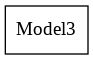

In [79]:
m3 = Model3()
m3(np.array([[1,2,1,2]]))
m3.summary()
utils.plot_model(m3, show_shapes = True)

#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


In [80]:
def build_model1():
  x = layers.Input(shape = (3,))
  y = layers.Dense(4)(x)
  y = layers.Dense(8)(y)
  y = layers.Dense(4)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x, y)
  return model


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 16        
                                                                 
 dense_51 (Dense)            (None, 8)                 40        
                                                                 
 dense_52 (Dense)            (None, 4)                 36        
                                                                 
 dense_53 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


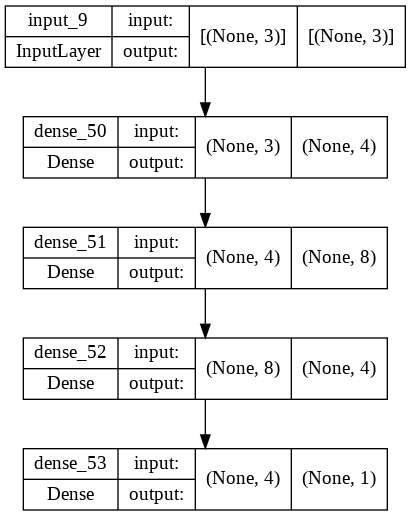

In [81]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes = True)

* keras Sequential API


In [82]:
def build_model2():
  model = tf.keras.Sequential()
  model.add( layers.Input(shape = (3,)))
  model.add( layers.Dense(4))
  model.add( layers.Dense(8))
  model.add( layers.Dense(4))
  model.add( layers.Dense(1))
  
  return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 4)                 16        
                                                                 
 dense_59 (Dense)            (None, 8)                 40        
                                                                 
 dense_60 (Dense)            (None, 4)                 36        
                                                                 
 dense_61 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


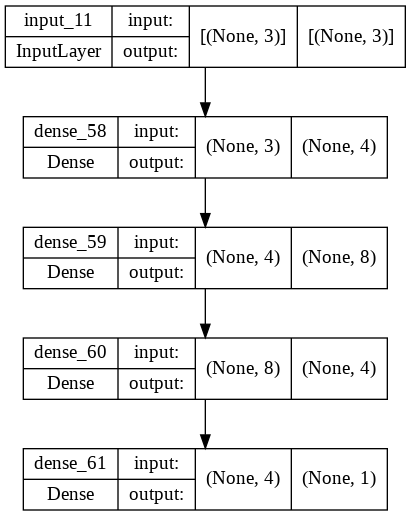

In [84]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes = True)

* Model Class Subsclassing



In [85]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올 때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape = (3)
    self.dense1 = layers.Dense(4, name = 'dense1')
    self.dense2 = layers.Dense(8, name = 'dense2')
    self.dense3 = layers.Dense(4, name = 'dense3')
    self.dense4 = layers.Dense(1, name = 'dense4')
    
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    y = self.dense4(y)
    return y

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  16        
                                                                 
 dense2 (Dense)              multiple                  40        
                                                                 
 dense3 (Dense)              multiple                  36        
                                                                 
 dense4 (Dense)              multiple                  5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


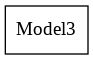

In [86]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3, show_shapes = True)